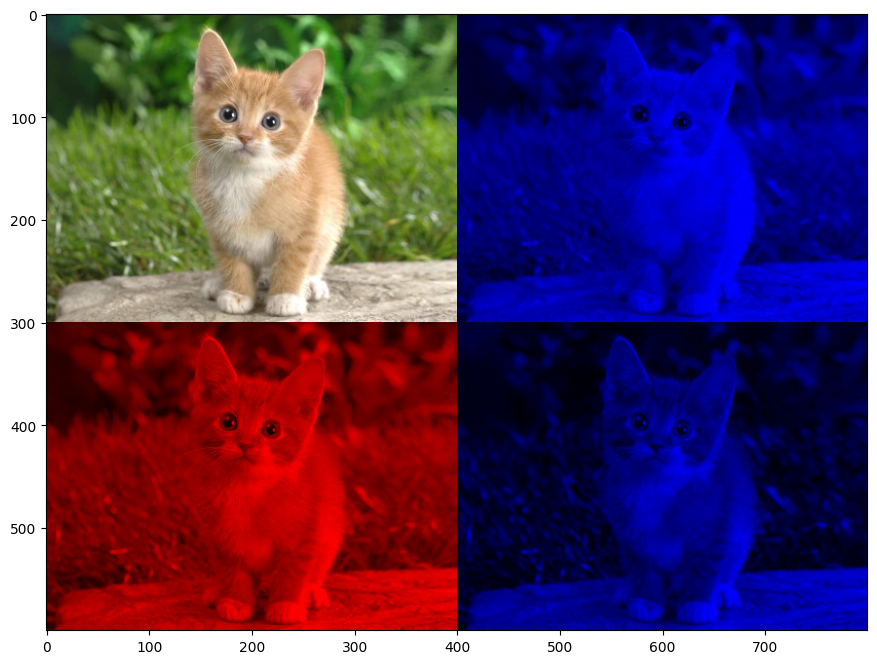

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

cat_img_path = '/content/cat1.jpg'
cat_img = cv2.imread(cat_img_path)

original_height, original_width = cat_img.shape[:2]

resized_cat = cv2.resize(cat_img, (original_width // 2, original_height // 2))
resized_cat = cv2.cvtColor(resized_cat, cv2.COLOR_BGR2RGB)
resized_cat1=resized_cat.copy()
resized_cat2=resized_cat.copy()
resized_cat3=resized_cat.copy()

hsv_img = cv2.cvtColor(resized_cat2, cv2.COLOR_RGB2HSV)
hsv_img[:, :, 0] = 0
hsv_img[:, :, 1] = 0

lab_img = cv2.cvtColor(resized_cat3, cv2.COLOR_RGB2LAB)
lab_img[:, :, 1] = 0
lab_img[:, :, 2] = 0


blue_img = resized_cat1
blue_img[:, :, 0] = 0
blue_img[:, :, 1] = 0

top_row = np.hstack((resized_cat, hsv_img))

bottom_row = np.hstack((lab_img, blue_img))

combined_image = np.vstack((top_row, bottom_row))

plt.figure(figsize=(12, 8))
plt.imshow(combined_image)
plt.axis('on')
plt.show()

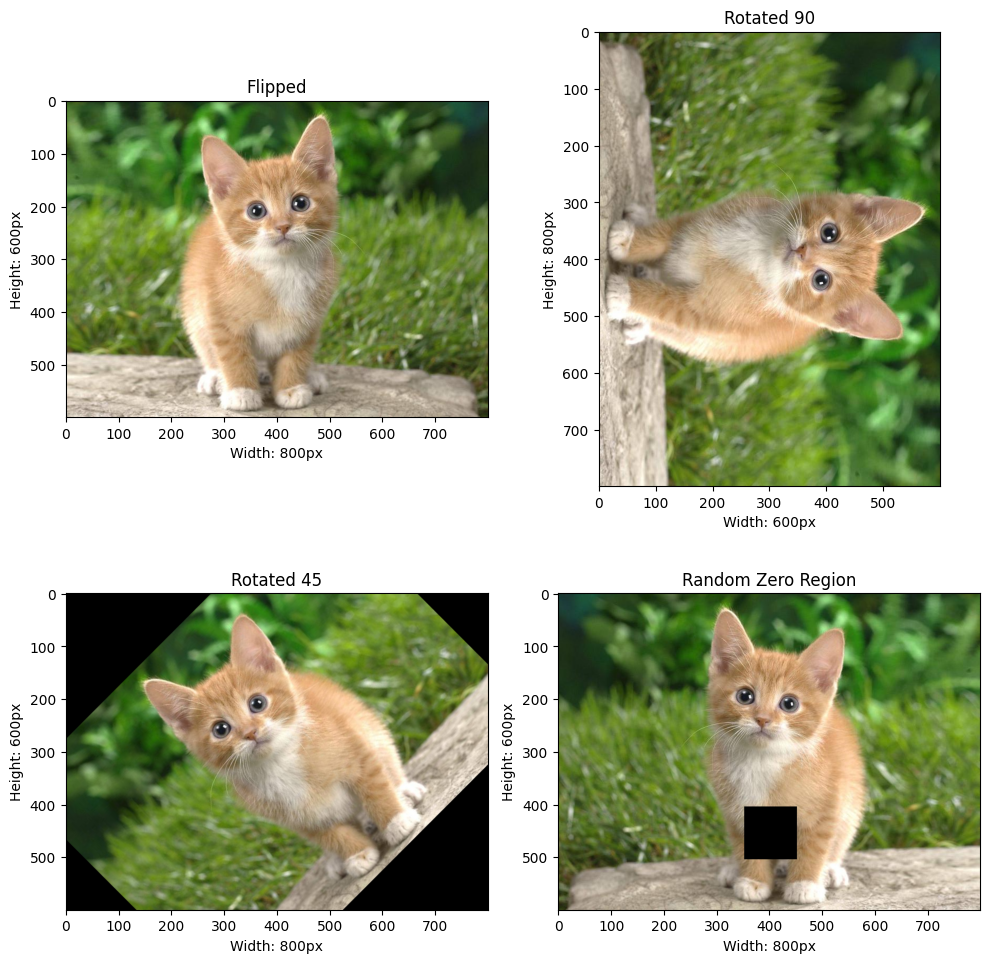

In [ ]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

cat_img = cv2.imread('/content/cat1.jpg')

flipped_cat = cv2.flip(cat_img, 1)

rotated_90 = cv2.rotate(cat_img, cv2.ROTATE_90_CLOCKWISE)

(h, w) = cat_img.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated_45 = cv2.warpAffine(cat_img, M, (w, h))

x, y = random.randint(0, cat_img.shape[1] - 100), random.randint(0, cat_img.shape[0] - 100)
cat_img_with_zero = cat_img.copy()
cat_img_with_zero[y:y+100, x:x+100] = 0

images = [flipped_cat, rotated_90, rotated_45, cat_img_with_zero]
titles = ["Flipped", "Rotated 90", "Rotated 45", "Random Zero Region"]

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for i, ax in enumerate(axs.flat):
    ax.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    ax.set_title(titles[i])
    height, width = images[i].shape[:2]

    ax.set_xlabel(f'Width: {width}px')
    ax.set_ylabel(f'Height: {height}px')

    ax.axis('on')

plt.tight_layout()
plt.show()

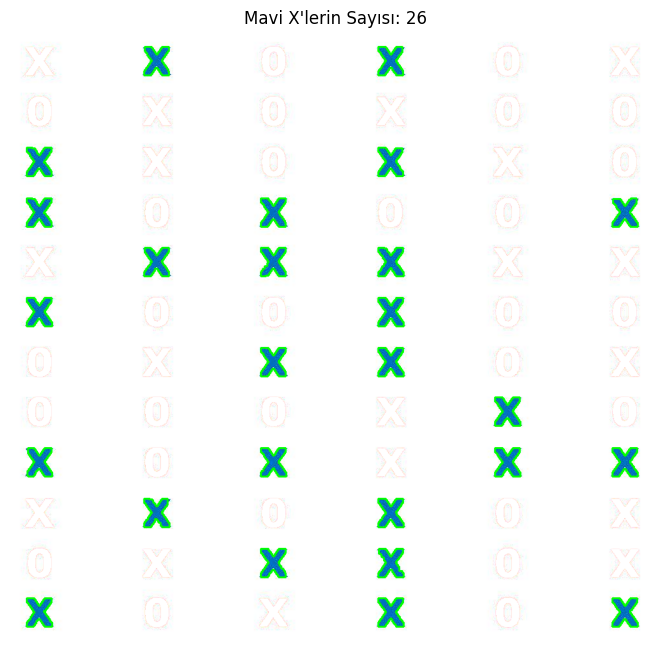

Toplam Mavi X Sayısı: 26


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/red_x.png')
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

lower_red1 = np.array([0, 70, 50])
upper_red1 = np.array([10, 255, 255])
mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)

lower_red2 = np.array([170, 70, 50])
upper_red2 = np.array([180, 255, 255])
mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)

mask_red = cv2.bitwise_or(mask_red1, mask_red2)

image[mask_red > 0] = [255, 255, 255]

lower_blue = np.array([100, 150, 50])
upper_blue = np.array([140, 255, 255])
mask_blue = cv2.inRange(cv2.cvtColor(image, cv2.COLOR_BGR2HSV), lower_blue, upper_blue)

kernel = np.ones((3,3), np.uint8)
mask_blue = cv2.morphologyEx(mask_blue, cv2.MORPH_OPEN, kernel, iterations=2)
mask_blue = cv2.dilate(mask_blue, kernel, iterations=1)

contours, _ = cv2.findContours(mask_blue, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

count = 0
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 100:
        x, y, w, h = cv2.boundingRect(cnt)
        aspect_ratio = float(w)/h
        if 0.8 < aspect_ratio < 1.2:
            epsilon = 0.02 * cv2.arcLength(cnt, True)
            approx = cv2.approxPolyDP(cnt, epsilon, True)
            if len(approx) >= 8:
                count += 1
                cv2.drawContours(image, [cnt], -1, (0, 255, 0), 2)

plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title(f'Mavi X\'lerin Sayısı: {count}')
plt.axis('off')
plt.show()

print(f"Toplam Mavi X Sayısı: {count}")